In [10]:

!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install pymssql
!pip install tempfile2
import warnings
warnings.filterwarnings('ignore')

E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mdbtools is already the newest version (1.0.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import model.utility.k_analysis_util as k_analysis_util

In [20]:
db_path = "/content/drive/MyDrive/Dev/Kjvan/kjdb_predict_result.accdb"
today = datetime.datetime.now()


2

In [14]:
sort_key ='pr_rank'
#sort_key ='pr_hE_pred'
ascending=True
cmd = f"select * from PredictResults"
print(cmd)

select * from PredictResults


In [15]:
df_re = k_analysis_util.execute_mdb_sql(db_path, cmd)


# まず'pr_program_id'を文字列型に変換
df_re['pr_program_id'] = df_re['pr_program_id'].astype(str)

# その後、文字列抽出と数値変換を実行
df_re = df_re[df_re['pr_program_id'].str[4:6].astype(int) >= today1.mont]
#df_re=df_filtered

Query output saved to: /tmp/tmp4wvc6iy2.txt


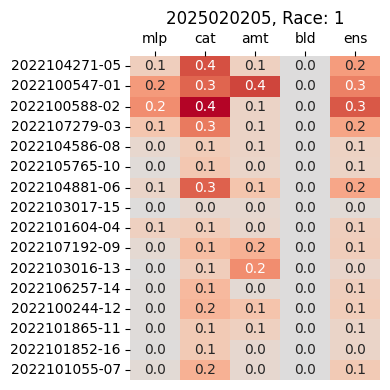

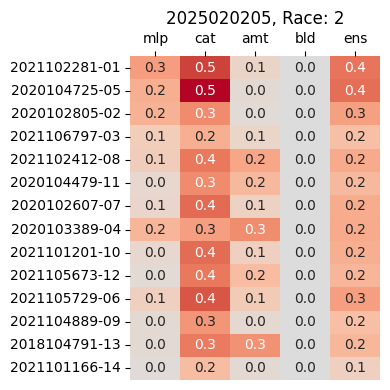

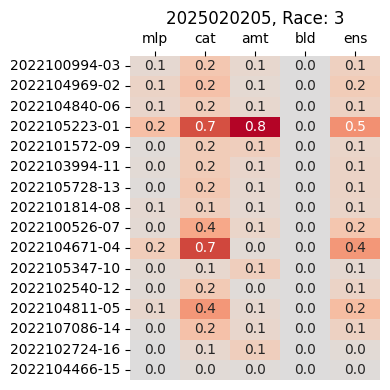

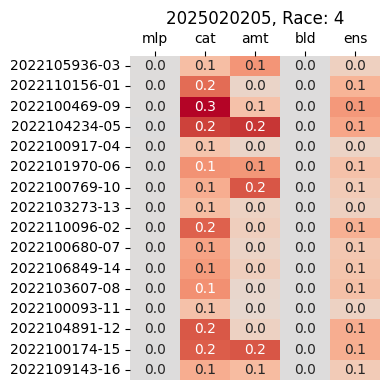

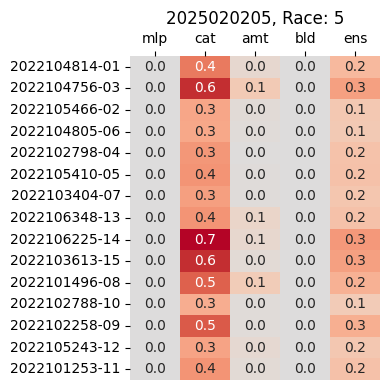

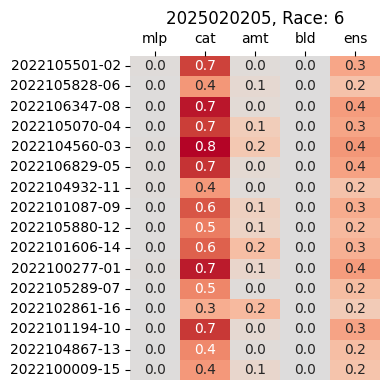

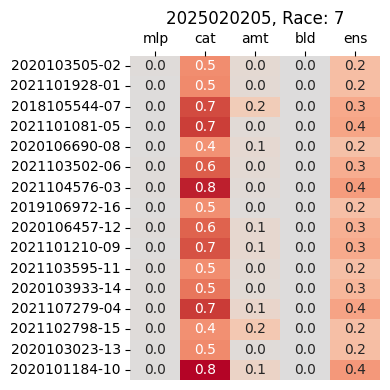

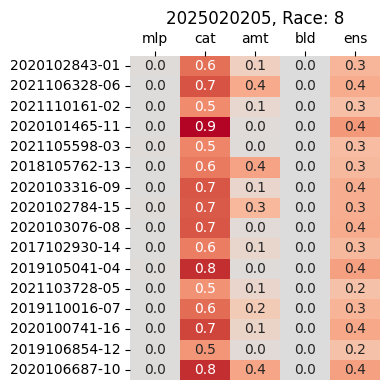

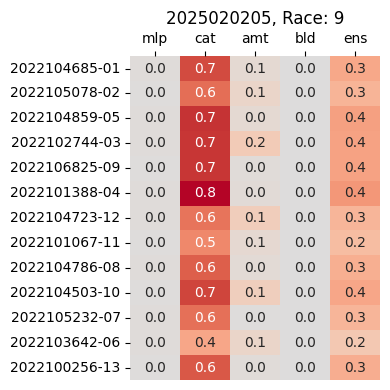

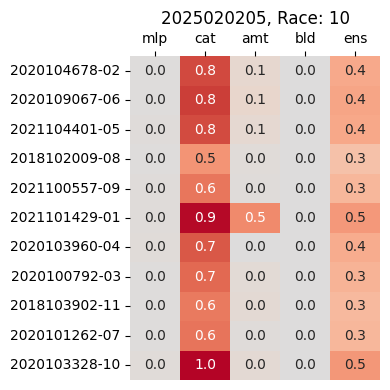

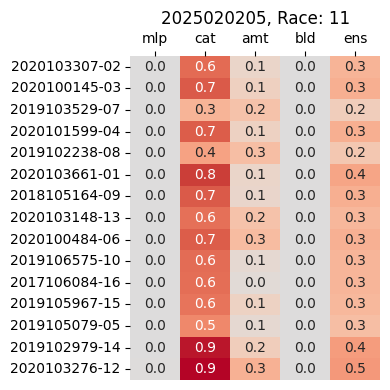

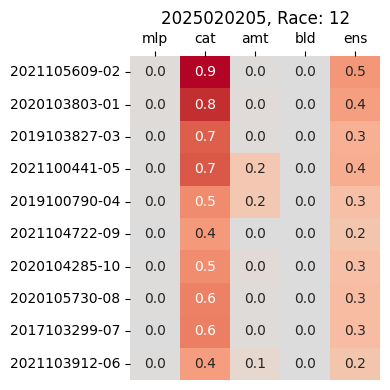

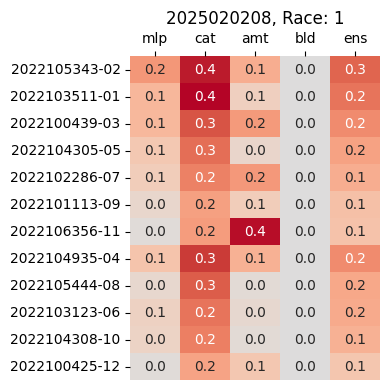

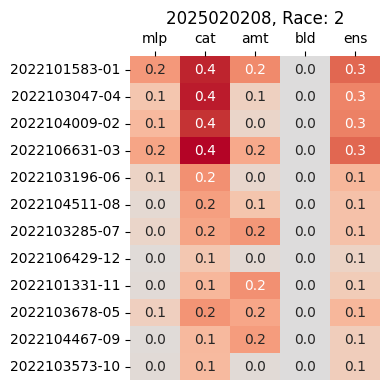

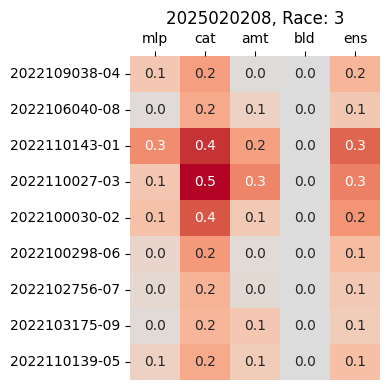

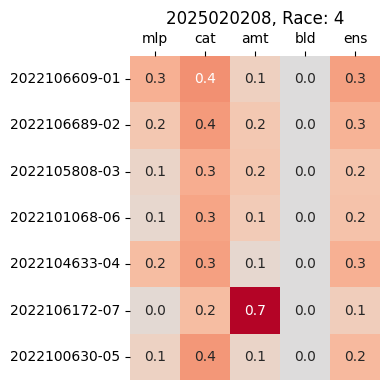

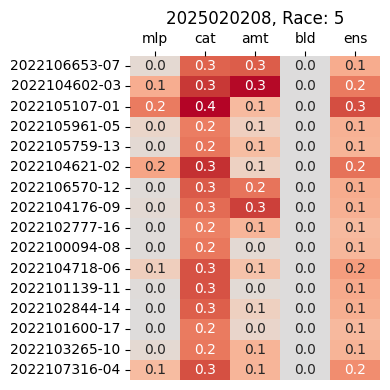

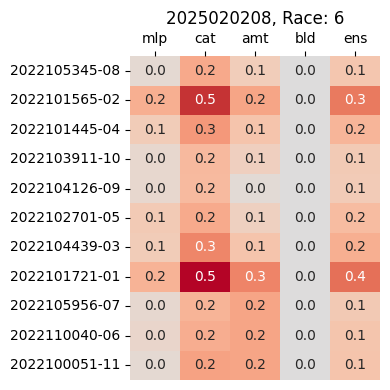

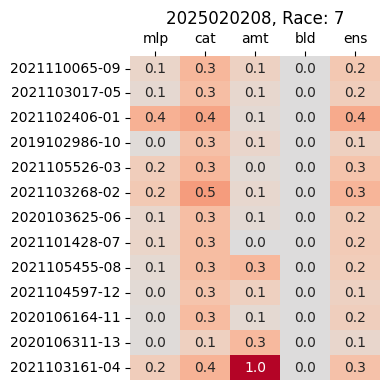

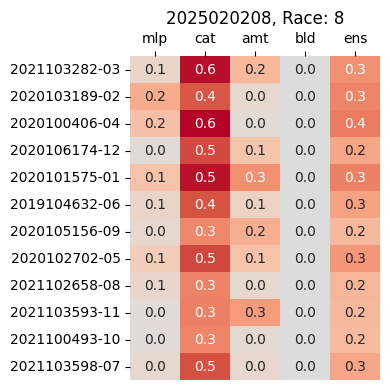

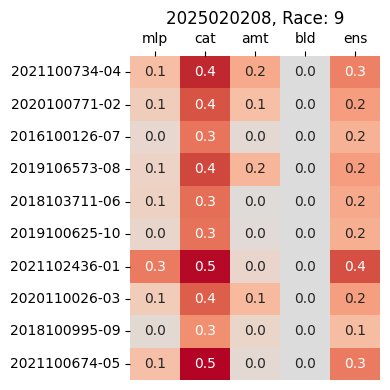

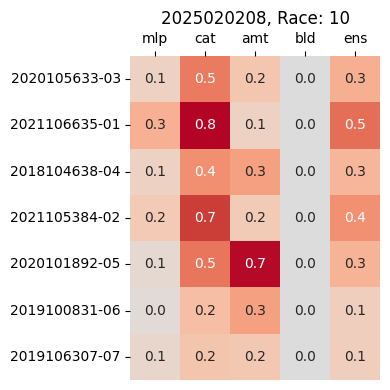

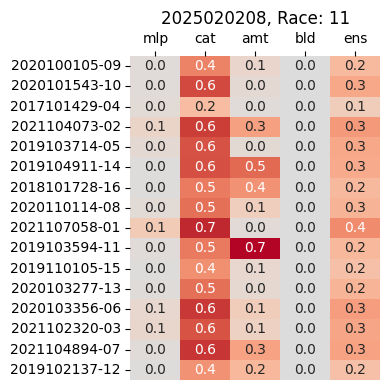

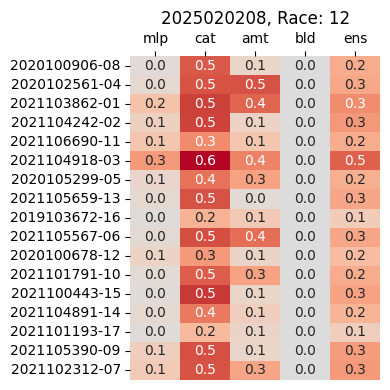

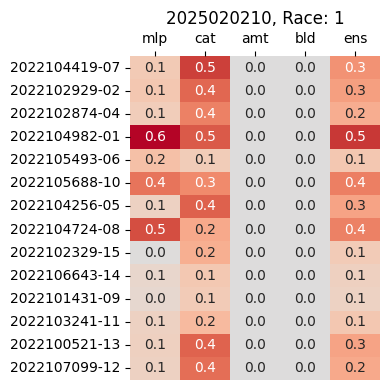

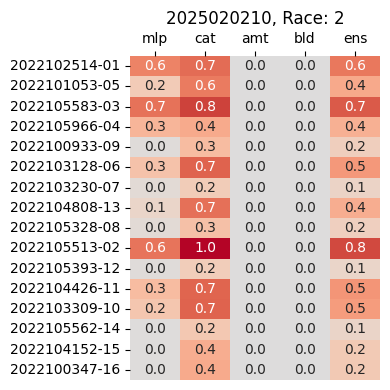

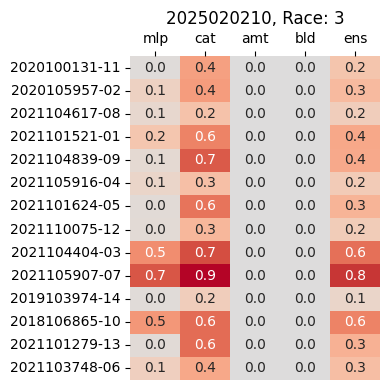

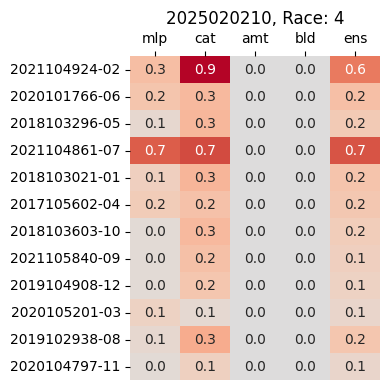

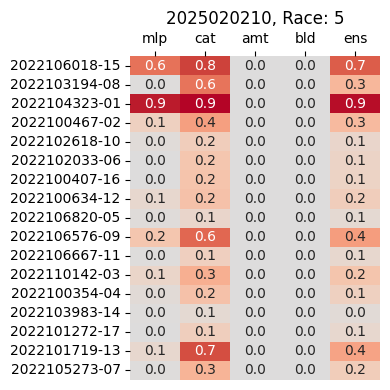

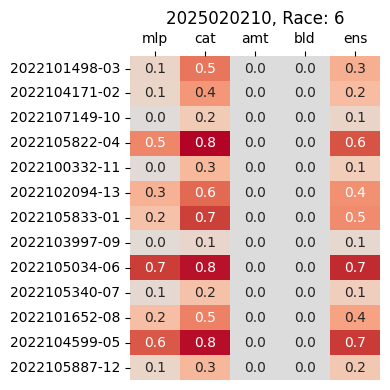

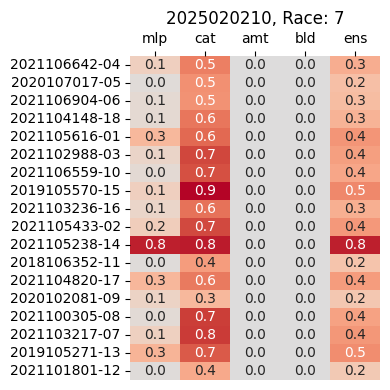

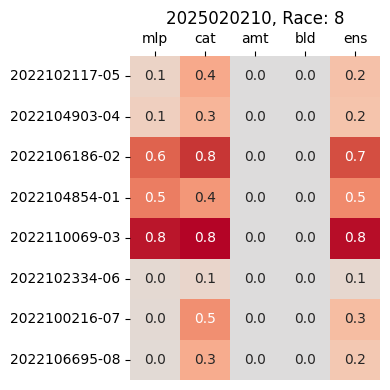

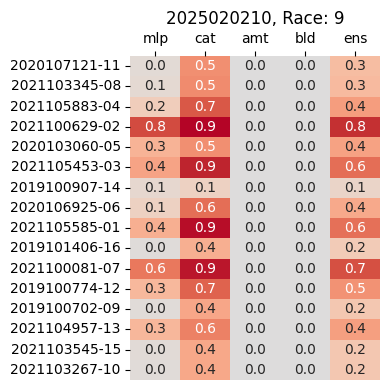

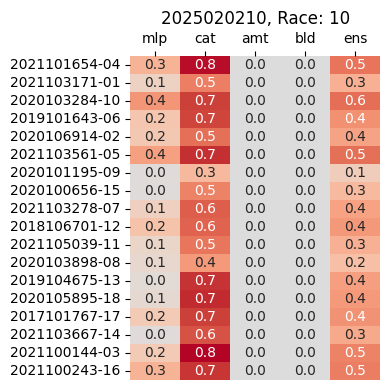

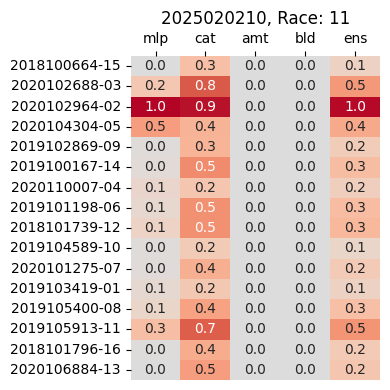

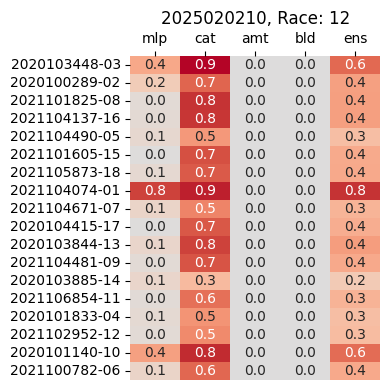

In [17]:
import warnings
from google.colab import drive
import sys
import numpy as np
import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import model.utility.k_analysis_util as k_analysis_util

# 表示オプションの設定
pd.set_option('display.max_colwidth', 1)  # 各列の最大表示幅を10に設定

# カスタムカラーマップの作成
colors = [
    (255/255, 255/255, 255/255),  # #FFF2F2 - ほぼ白
    # (255/255, 230/255, 230/255),  # #FFE6E6 - 非常に薄い赤 (90%)
    # (255/255, 217/255, 217/255),  # #FFD9D9 - 非常に薄い赤 (85%)
    (255/255, 204/255, 204/255),  # #FFCCCC - 非常に薄い赤 (80%)
    (255/255, 179/255, 179/255),  # #FFB3B3 - 薄い赤 (70%)
    (255/255, 153/255, 153/255),  # #FF9999 - 薄い赤 (60%)
    (255/255, 128/255, 128/255),  # #FF8080 - 薄い赤 (50%)
    (255/255, 102/255, 102/255),  # #FF6666 - 薄い赤 (40%)
    (255/255, 51/255, 51/255),    # #FF3333 - 薄い赤 (20%)
    (255/255, 0/255, 0/255),      # #FF0000 - 純粋な赤
    (204/255, 0/255, 0/255),      # #CC0000 - 赤
]
custom_cmap = sns.blend_palette(colors, as_cmap=True)
# bt_place、bt_distance、bt_track_cdでグループ化
grouped = df_re.groupby(['pr_program_id', 'pr_race'])

# 各グループごとにヒートマップを描画
for (program_id, race), group_df in grouped:
    try:
      query = f"pr_rank.astype('int') != 0"
      group_df2 = group_df.query(query, engine='python')
      if(len(group_df2)):
        # pr_rankでソート
        sorted_group_df = group_df2.sort_values(sort_key, ascending = ascending)

        # 'pr_horse_id-pr_vote' の列を作成
        sorted_group_df['pr_horse_id-pr_vote'] = sorted_group_df['pr_horse_id'].astype(str) + '-' + sorted_group_df['pr_vote'].astype(str).str.zfill(2)  # 2桁の0詰め

        # ヒートマップのデータ作成
        heatmap_data = sorted_group_df[['pr_horse_id-pr_vote', 'pr_h1_pred', 'pr_h2_pred', 'pr_h3_pred', 'pr_h4_pred', 'pr_hE_pred']]
        heatmap_data = heatmap_data.set_index('pr_horse_id-pr_vote')
        heatmap_data = heatmap_data.rename(columns={
            'pr_h1_pred': 'mlp',
            'pr_h2_pred': 'cat',
            'pr_h3_pred': 'amt',
            'pr_h4_pred': 'bld',
            'pr_hE_pred': 'ens',
        })
        m = program_id[4:6]
        plt.figure(figsize=(4, 4))  # 図のサイズ調整
        ax = sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', center=0, cbar=False)
        ax.xaxis.set_ticks_position('top')     # 目盛りを上部に
        ax.xaxis.set_label_position('top')     # ラベルを上部に
        plt.title(f'{program_id}, Race: {race}')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()
    except Exception as e:
      print(e)
